In [1]:
from Binaries import *

Trigger = HardwareClassifier()

/cr/users/filip/Binaries/Classifier.py:666: RuntimeWarning: invalid value encountered in sqrt
  eff_err = 1/(n_hit + n_miss)**2 * np.sqrt( n_hit**3 + n_miss**3 - 2 * np.sqrt((n_hit * n_miss)**3) )


/cr/users/filip/Binaries/Classifier.py:938: RuntimeWarning: invalid value encountered in sqrt
  eff_err = 1/(n_hit + n_miss)**2 * np.sqrt( n_hit**3 + n_miss**3 - 2 * np.sqrt((n_hit * n_miss)**3) )


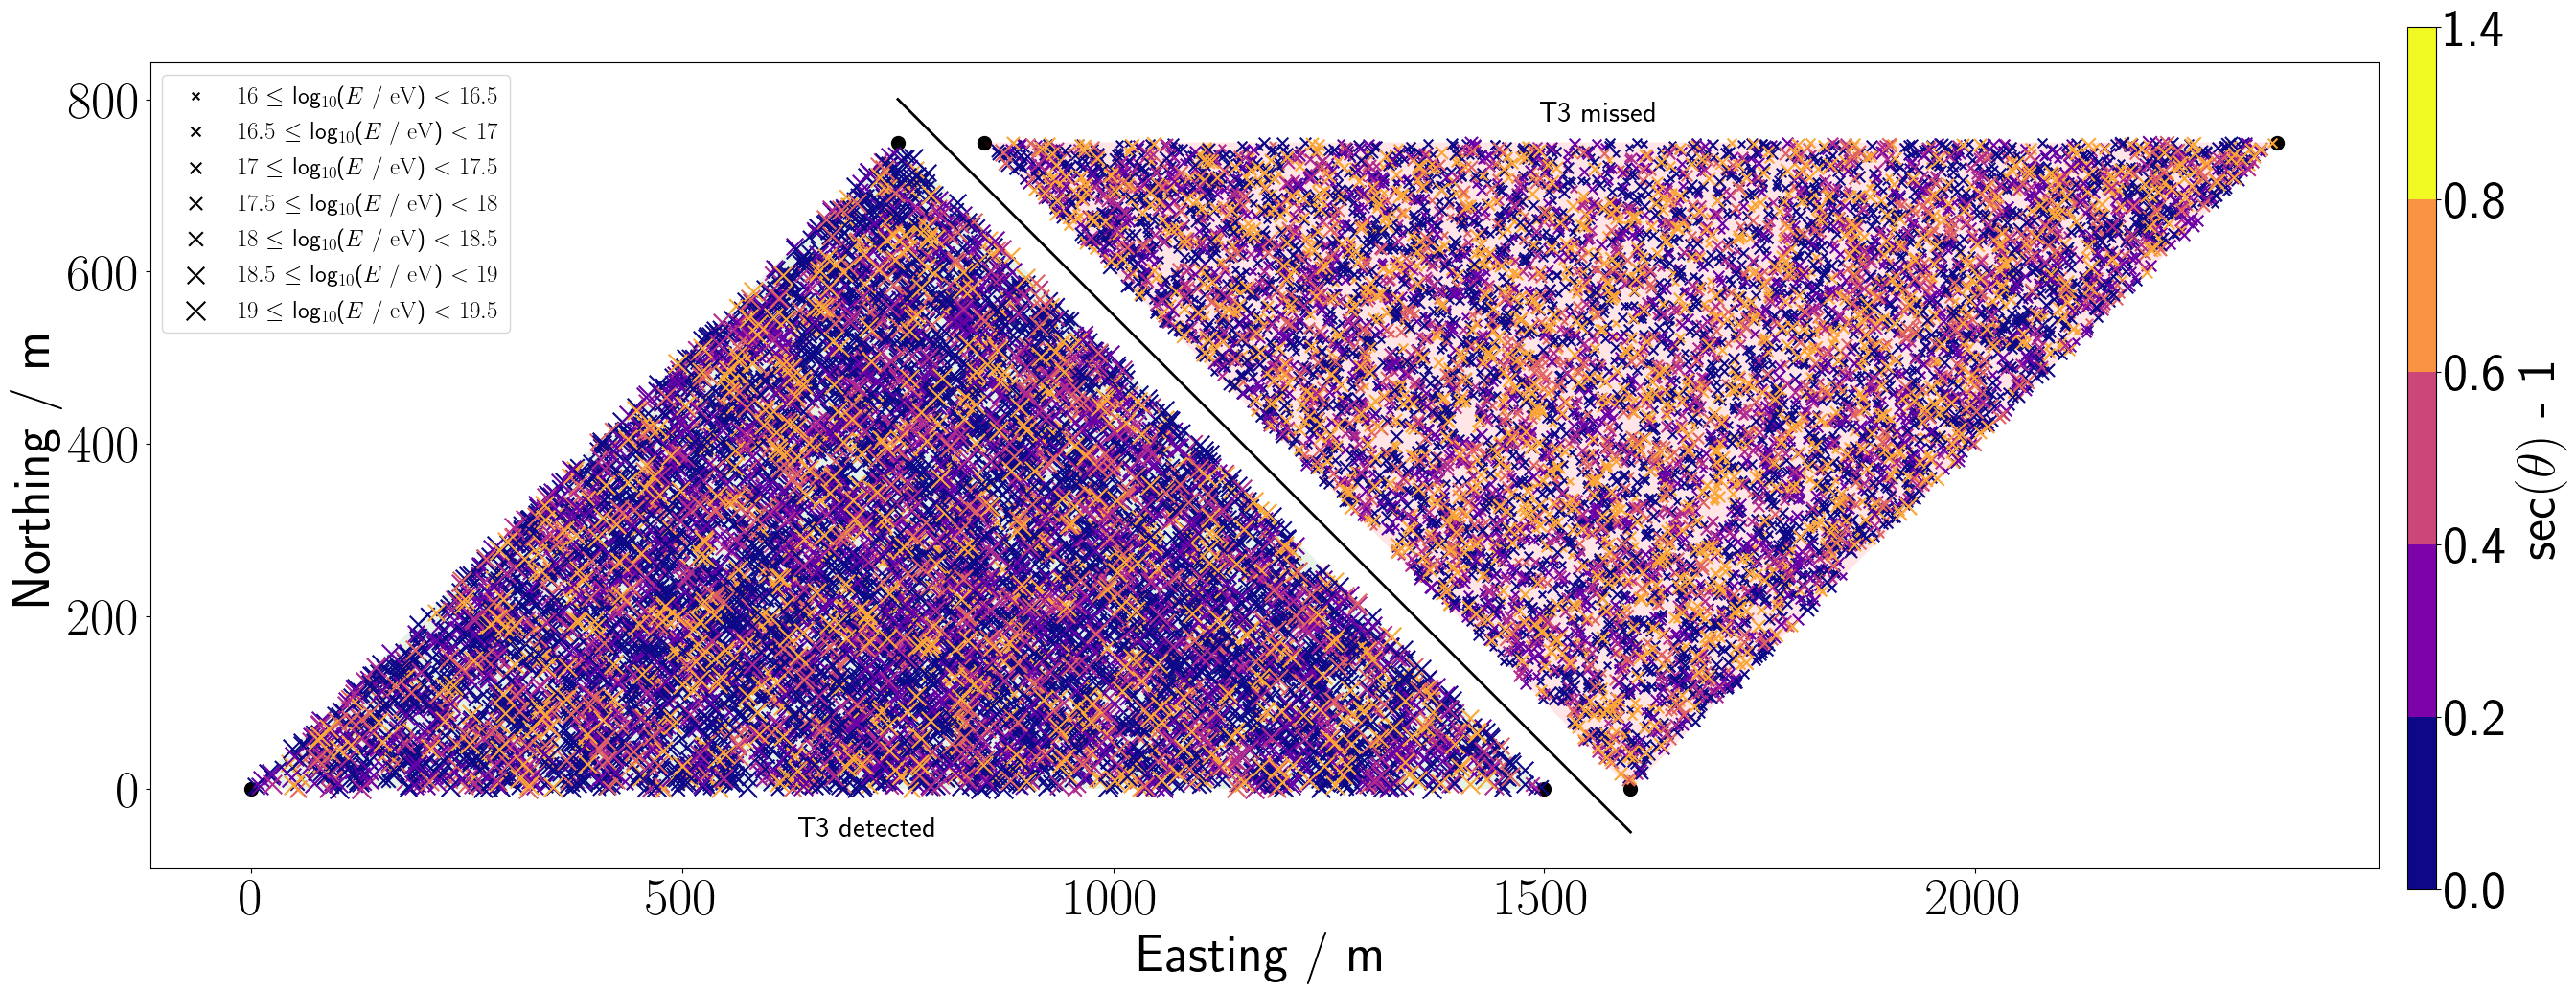

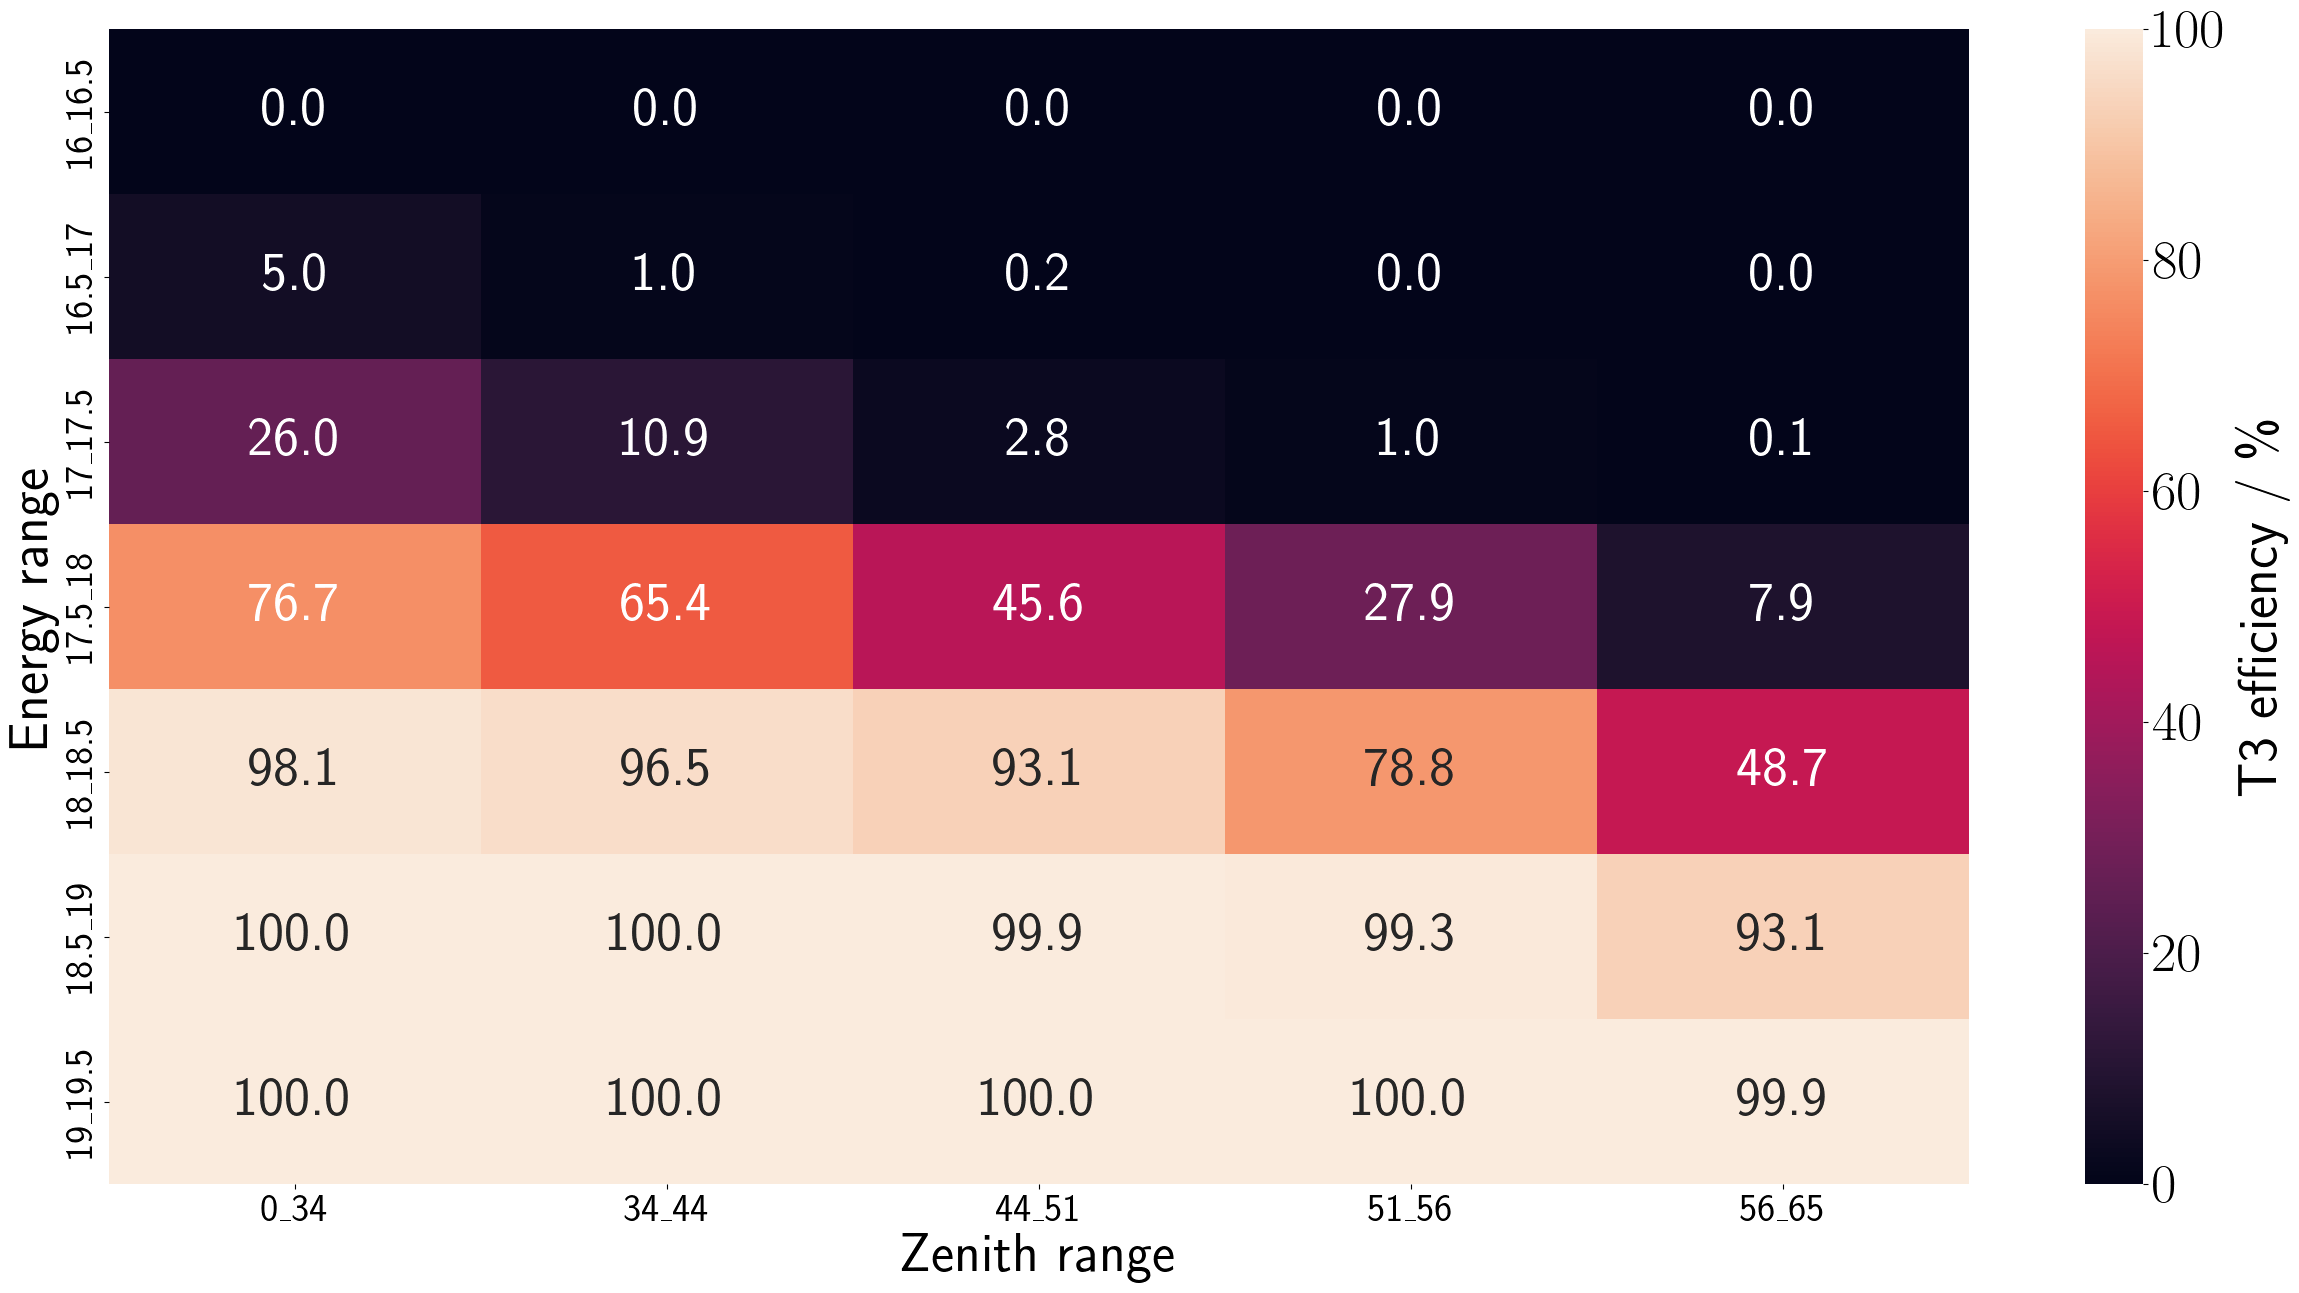

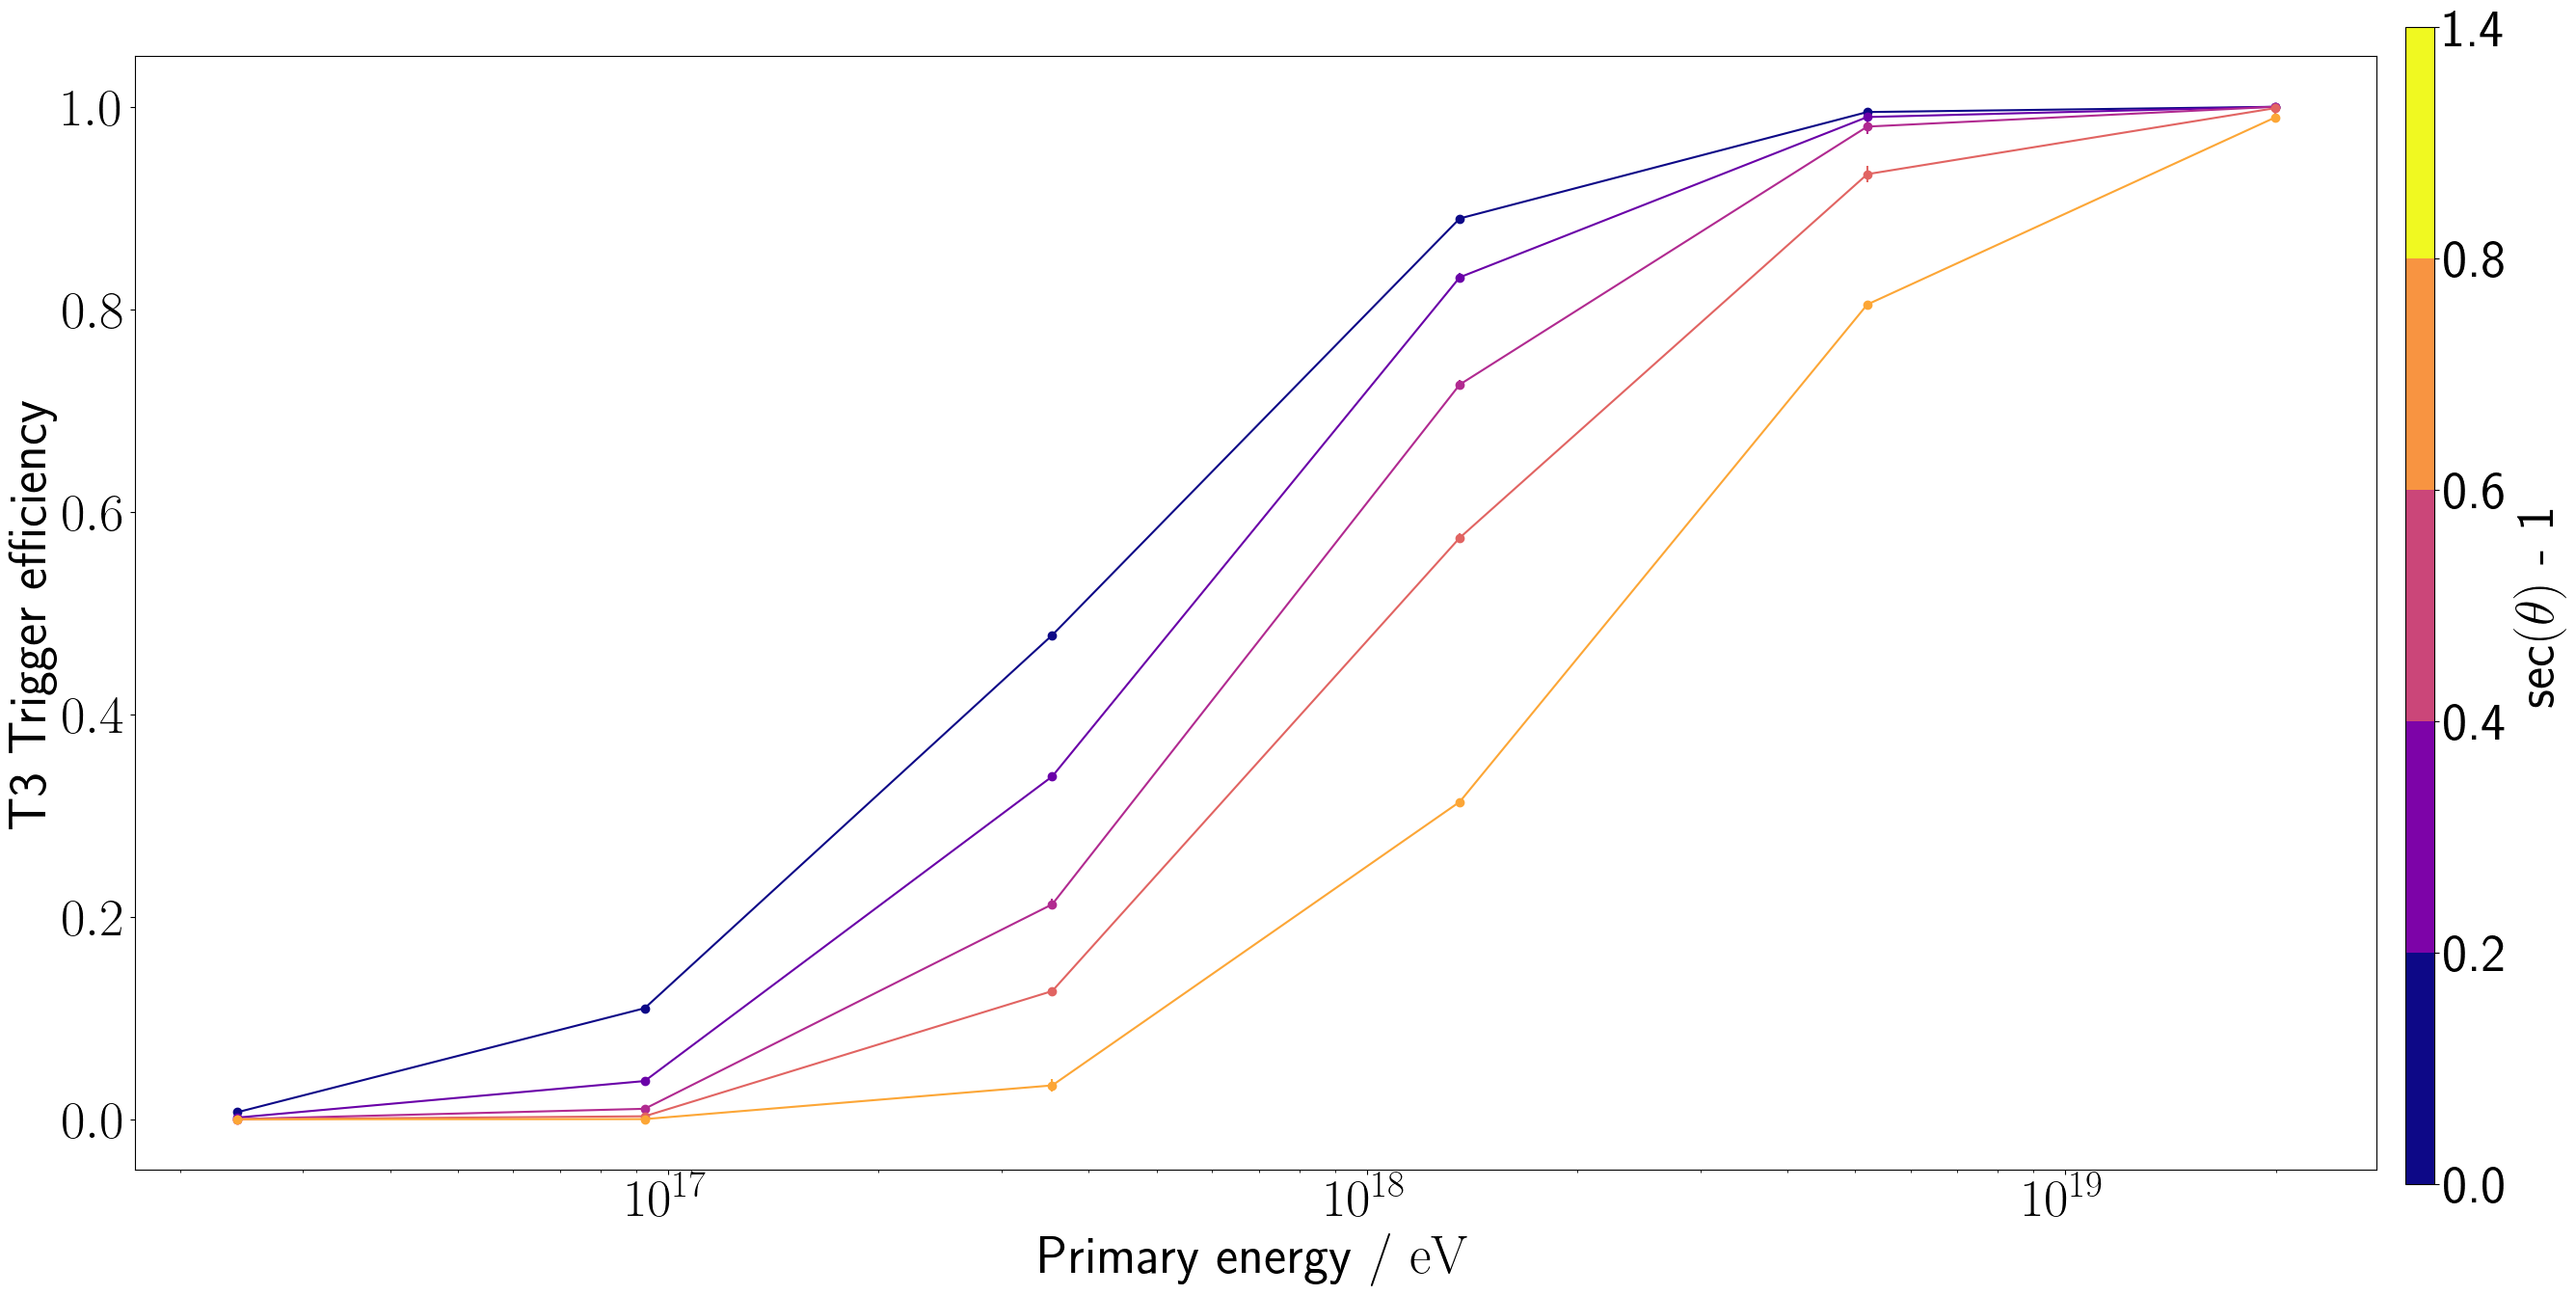

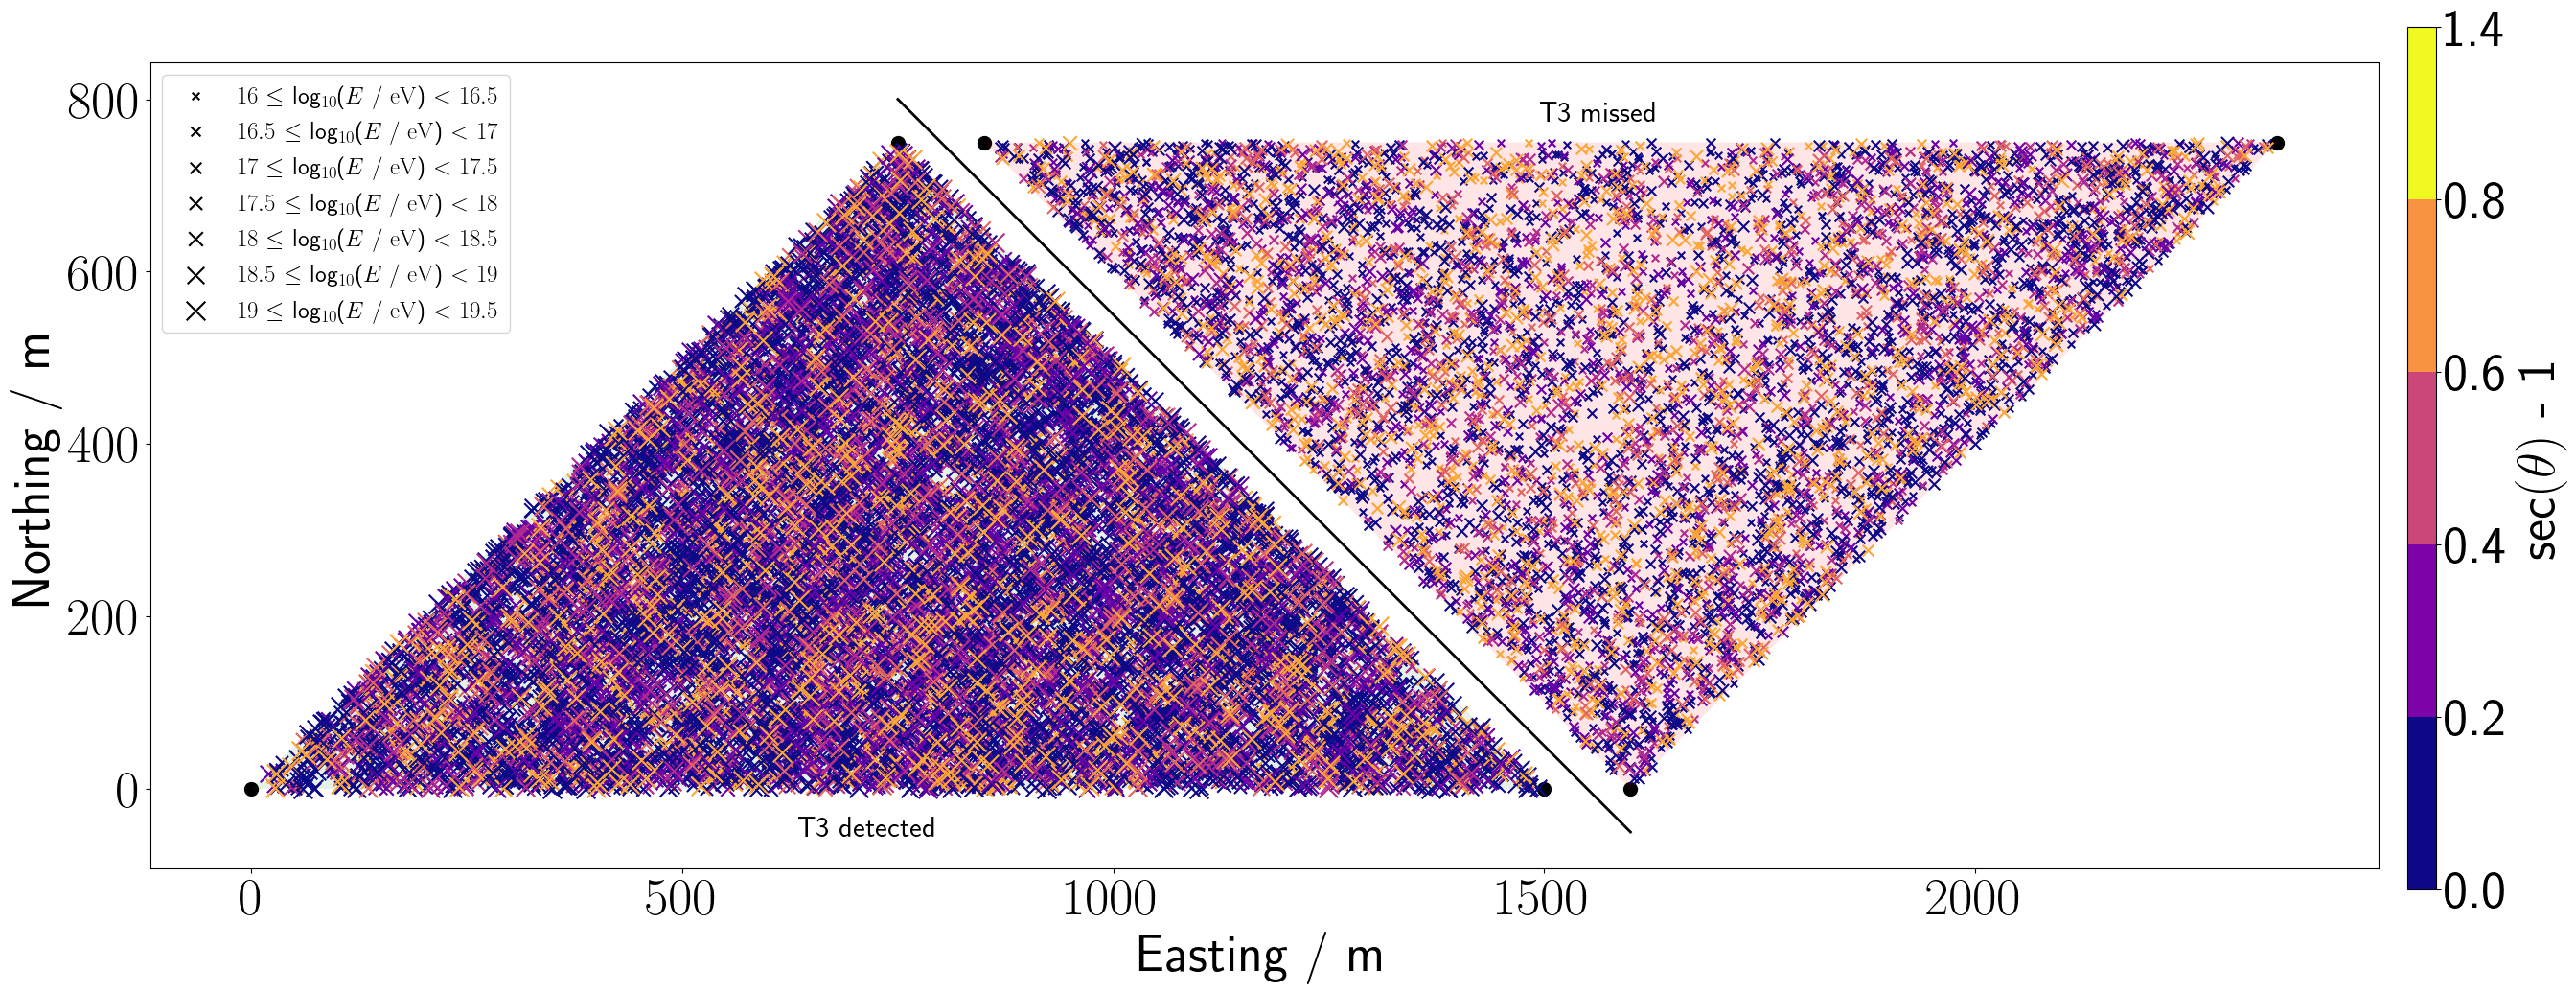

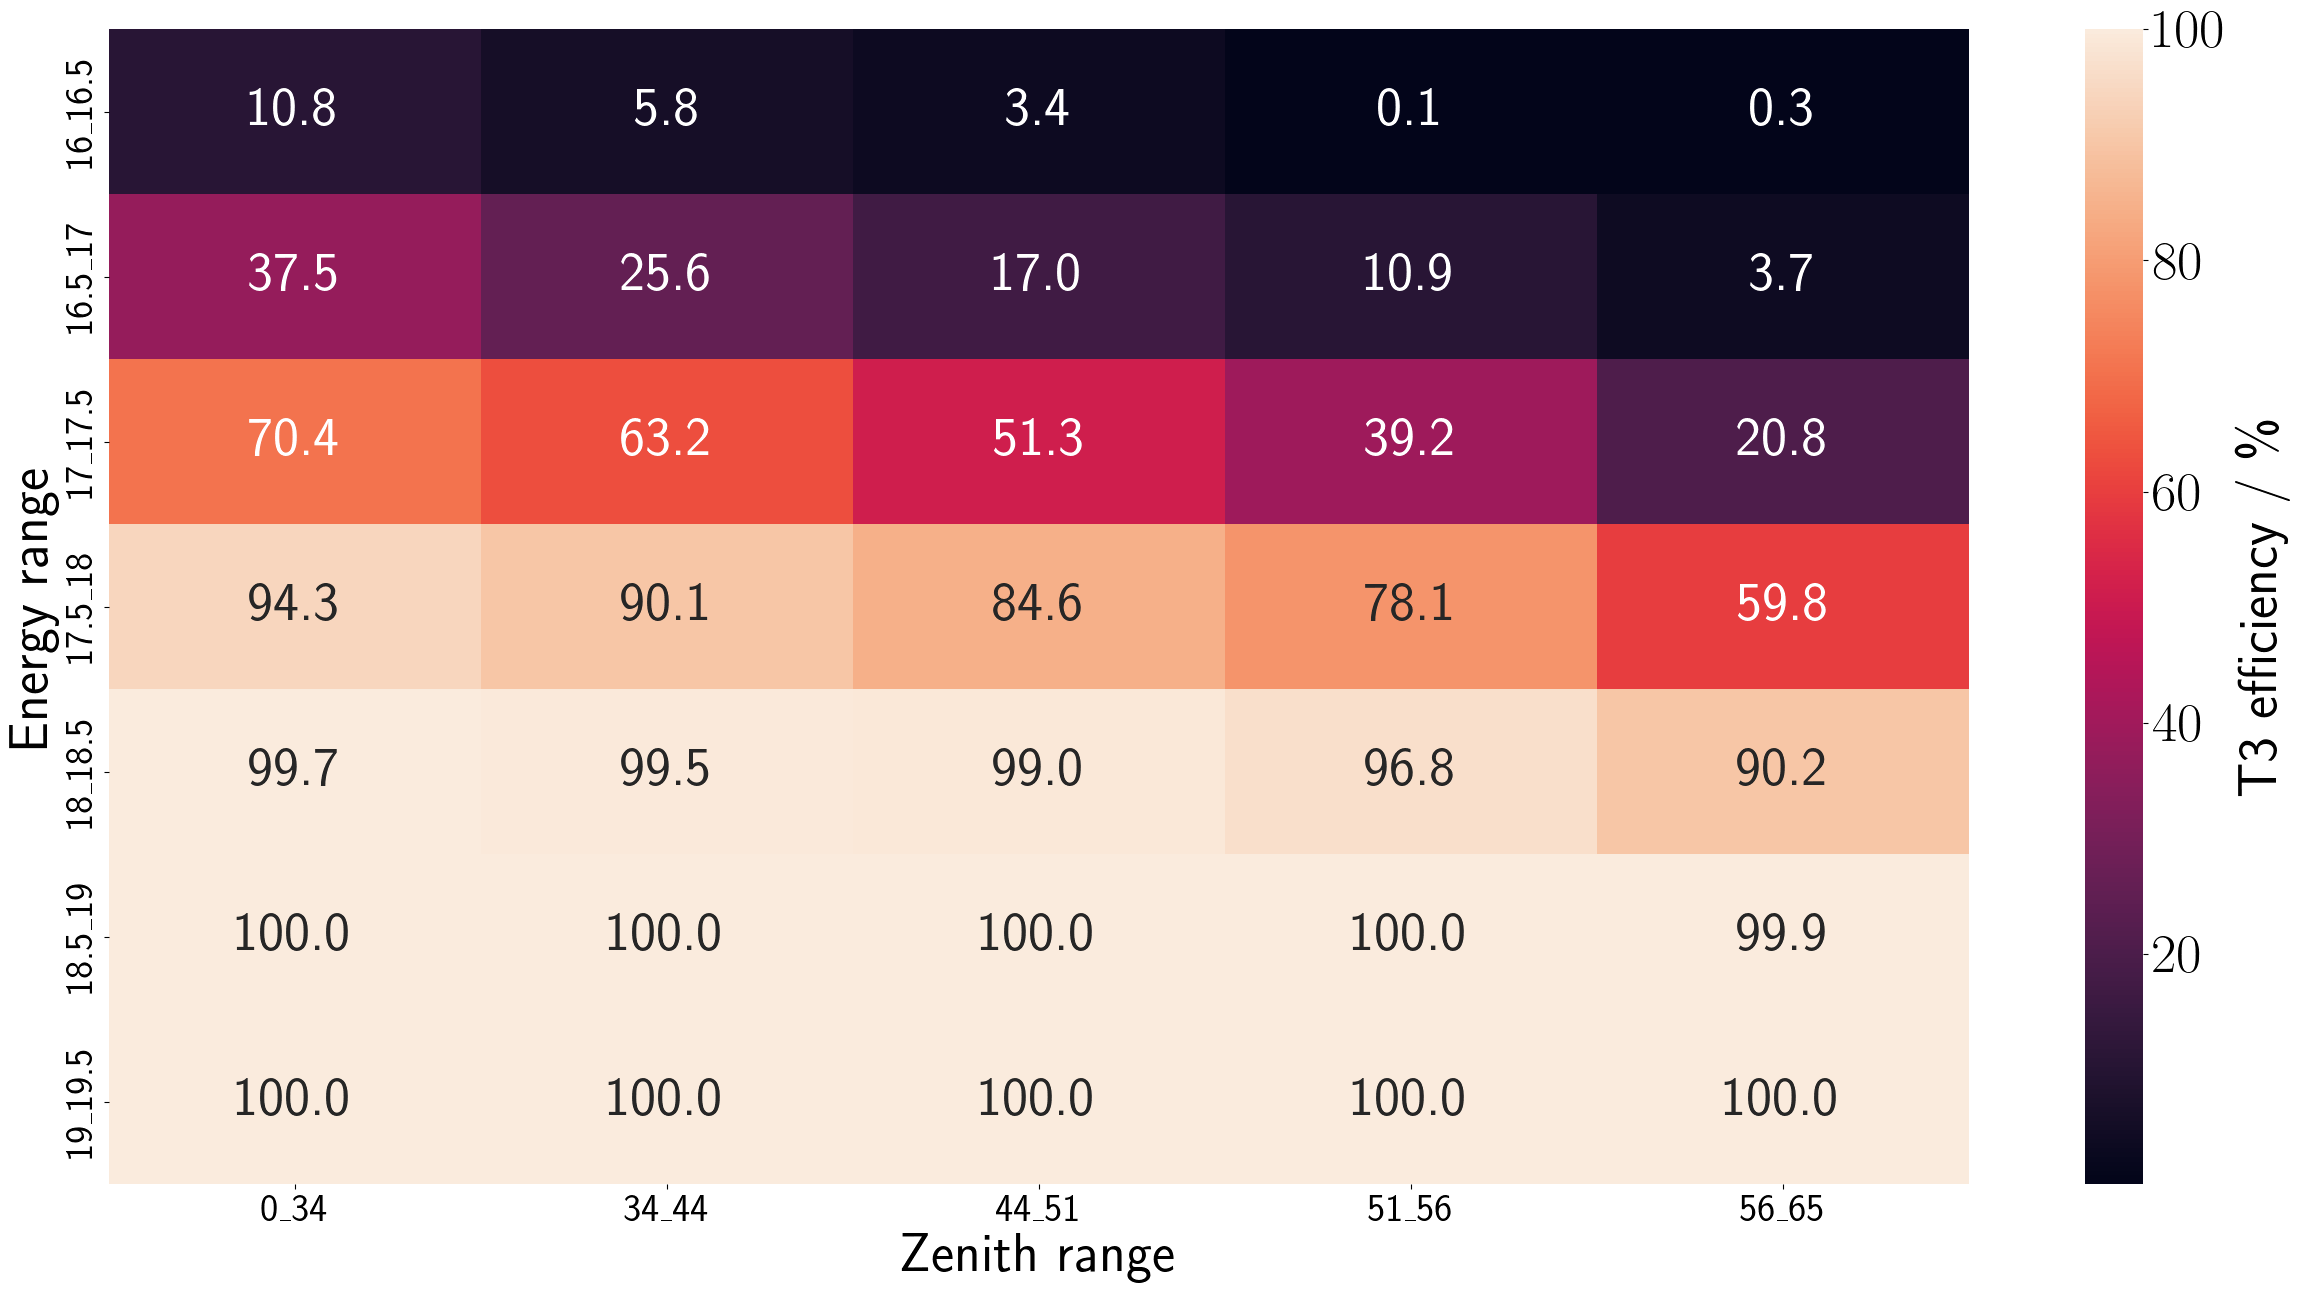

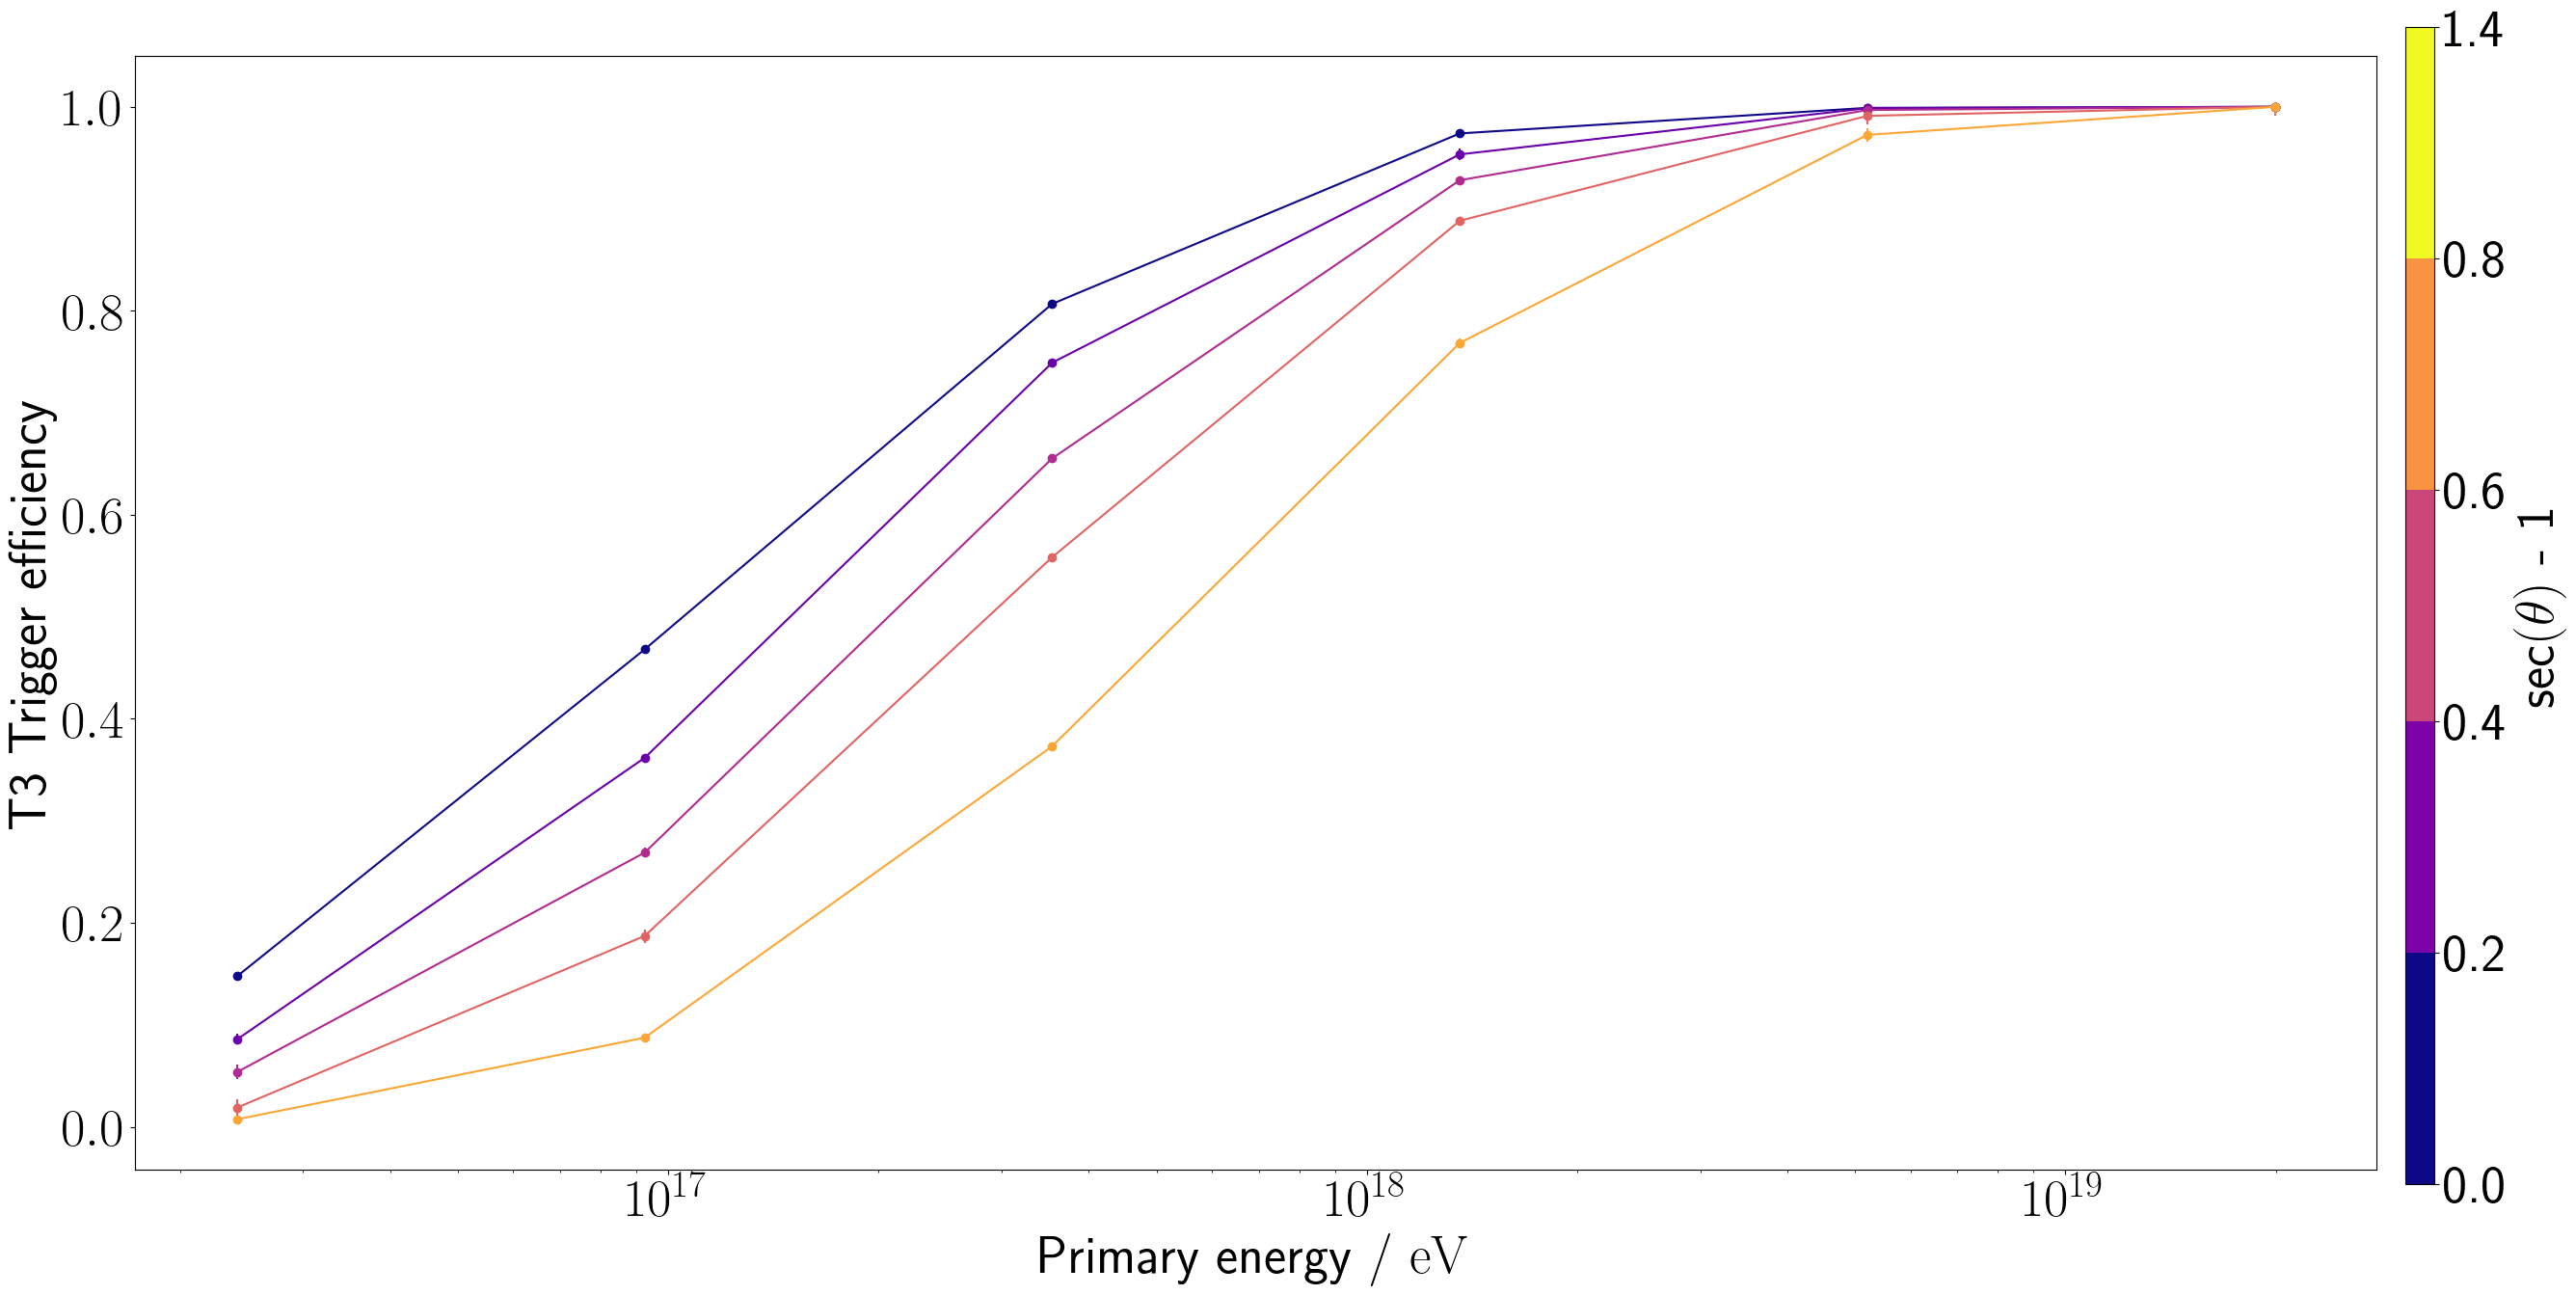

In [2]:
bins, eff = Trigger.do_t3_simulation("final_all_triggers", n_points = 1e6)
bins, mock = MockClassifier().do_t3_simulation(1e6)

/tmp/ipykernel_821956/3455697622.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cmap.get_cmap("plasma")
/tmp/ipykernel_821956/3455697622.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cmap.get_cmap("plasma")


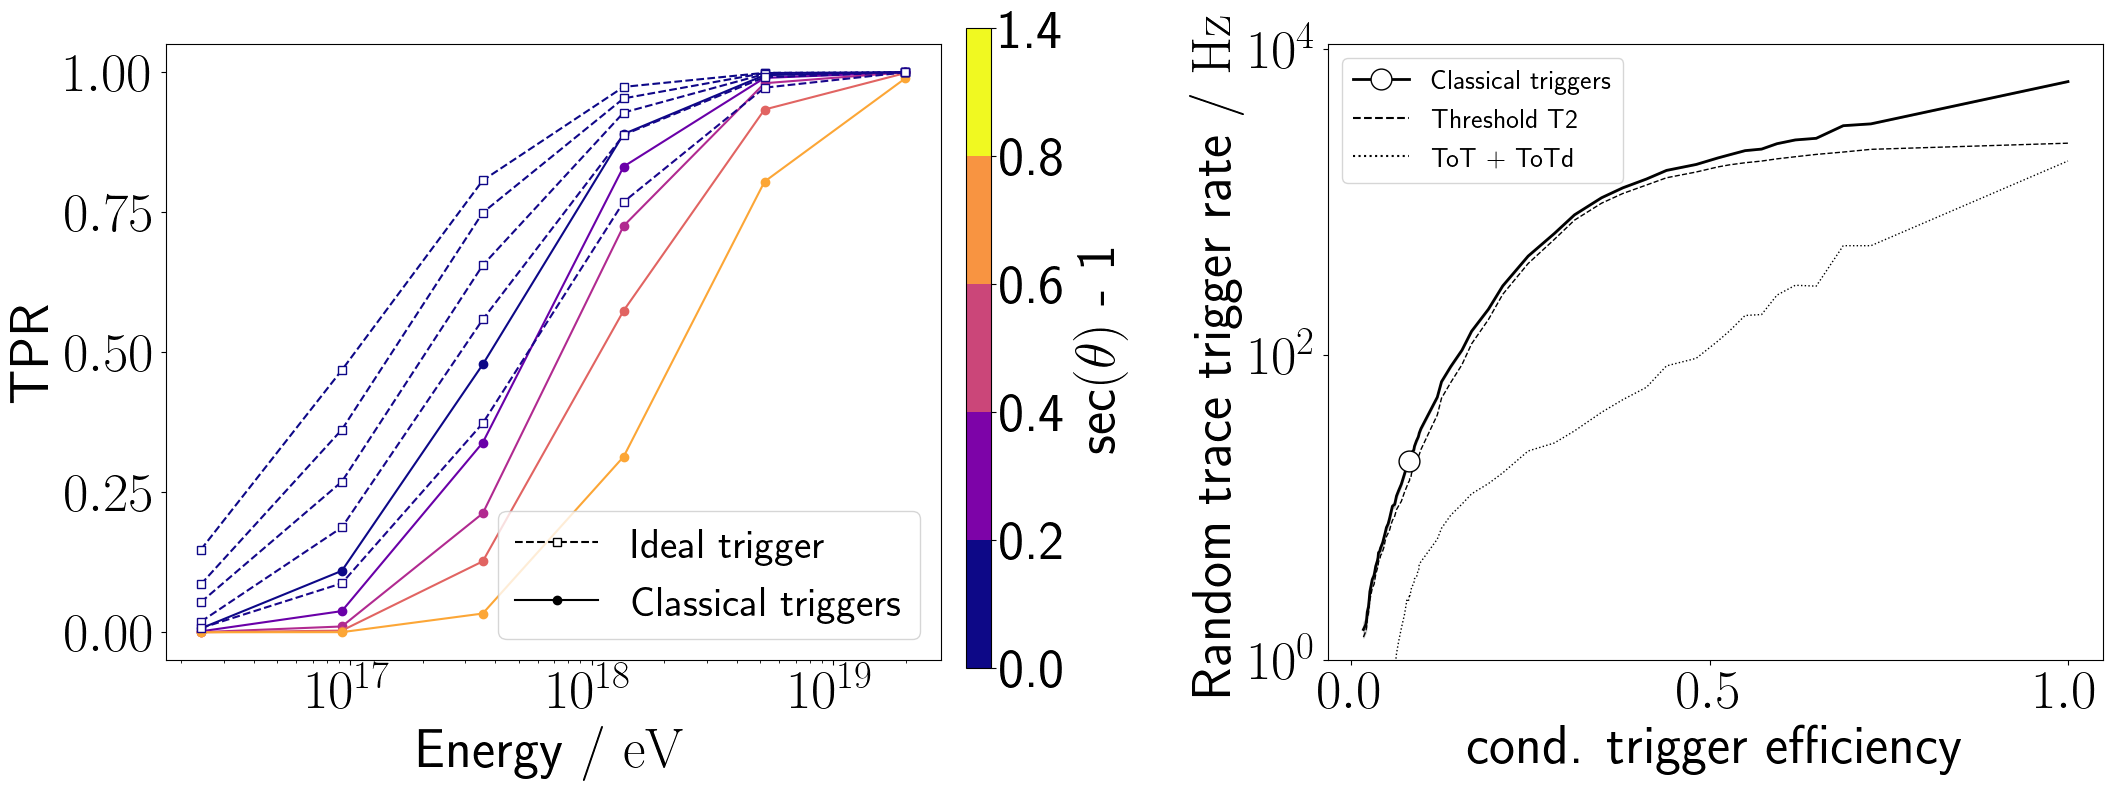

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8))

colormap = cmap.get_cmap("plasma")

for t, y in enumerate(eff):
    c = colormap(t / 5)
    ax1.errorbar(bins, y, c = c, fmt = "-o")

for t, y in enumerate(mock):
    c = colormap(t, 5)
    ax1.errorbar(bins, y, c = c, fmt = "--s", mfc = "w")

ax1.errorbar([], [], c = "k", fmt = "--s", mfc = "w", label = "Ideal trigger")
ax1.errorbar([], [], c = "k", fmt = "-o", label = "Classical triggers")
ax1.set_xscale("log")
Plot = MoneyPlot("", ax2)
ax2.errorbar([],[], ls = "--", label = "Threshold T2", c = "k")
ax2.errorbar([],[], ls = ":", label = "ToT + ToTd", c = "k")
ax1.set_xlabel("Energy / $\mathrm{eV}$")
ax1.set_ylabel("TPR")

ax1.legend(fontsize = 30)
theta_bins = [0, 26, 38, 49, 60, 90]
colormap = cmap.get_cmap("plasma")
norm = BoundaryNorm(theta_bins, colormap.N)
ax3 = fig.add_axes([0.445, 0.1, 0.01, 0.8])

cbar = ColorbarBase(ax3, cmap=colormap, norm=norm, label = r"sec$(\theta)$ - 1")
cbar.set_ticks(theta_bins)
cbar.set_ticklabels(["0.0", "0.2", "0.4", "0.6", "0.8", "1.4"])

plt.subplots_adjust(wspace = 0.5)

ax2.set_ylim(1)
ax2.legend(fontsize = 20)



In [ ]:
# bin_mock, eff_mock = Mock.do_t3_simulation(1e6)
# bin_trig, eff_trig = Trigger.do_t3_simulation("final_all_triggers", 1e6)

fig = plt.figure()
colormap = cmap.get_cmap("plasma")

for t, (mock, trig) in enumerate(zip(eff_mock, eff_trig)):
    c = colormap(t / len(eff_mock))

    plt.errorbar(bin_mock, mock, c = c, fmt = "-o", markersize = 10, mfc = "w")
    plt.errorbar(bin_mock, trig, c = c, fmt = "--o", markersize = 10, marker = "s")

plt.errorbar([], [], c = "k", fmt = "-o", markersize = 10, mfc = "w", label = "Ideal trigger")
plt.errorbar([], [], c = "k", fmt = "--o", markersize = 10, marker = "s", label = "Classical triggers")
plt.xlabel("Primary energy / $\mathrm{eV}$")
plt.ylabel("T3 trigger efficiency")
plt.xscale("log")
plt.legend()

norm = BoundaryNorm([0.00, 33.56, 44.42, 51.32, 56.25, 65.37], colormap.N)
ax2 = fig.add_axes([0.91, 0.1, 0.01, 0.8])

cbar = ColorbarBase(ax2, cmap=colormap, norm=norm, label = r"sec$(\theta)$ - 1")
cbar.set_ticks([0.00, 33.56, 44.42, 51.32, 56.25, 65.37])
cbar.set_ticklabels(["0.0", "0.2", "0.4", "0.6", "0.8", "1.4"])